### import packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib

### import dataset

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

### it a classification problem

In [3]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (614, 13)


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Start Analyzes on dataset

In [5]:
df.Loan_ID.value_counts()

LP002958    1
LP002974    1
LP001715    1
LP001316    1
LP002755    1
           ..
LP001978    1
LP001006    1
LP002035    1
LP001903    1
LP001798    1
Name: Loan_ID, Length: 614, dtype: int64

### Drop column load id as it unique to every datapoint and will have no impact on final predicted column

In [6]:
df=df.drop(['Loan_ID'],axis=1)

In [7]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df.ApplicantIncome.value_counts()

2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [13]:
df.CoapplicantIncome.value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [14]:
df.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [15]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [18]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### data transform complete

### search missing values

In [19]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### from above analyzes and from info func we know that null values are present in Married, gender, dependents, self_employed, LoanAmount, loan_amount_term,Credit_History

### fill null values one by one

In [21]:
df[df.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [22]:
df[['Gender']]=df[['Gender']].fillna(df['Gender'].mode()[0])
df[df.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [23]:
df[df.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [24]:
df[['Married']]=df[['Married']].fillna(df['Married'].mode()[0])
df[df.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [25]:
df[df.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [26]:
df[['Dependents']]=df[['Dependents']].fillna(df['Dependents'].mode()[0])
df[df.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [27]:
df[df.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [28]:
df[['Self_Employed']]=df[['Self_Employed']].fillna(df['Self_Employed'].mode()[0])
df[df.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [29]:
df[df.Credit_History.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
117,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [30]:
df[['Credit_History']]=df[['Credit_History']].fillna(df['Credit_History'].mode()[0])
df[df.Credit_History.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [31]:
df[df.LoanAmount.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,1.0,Urban,N
102,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

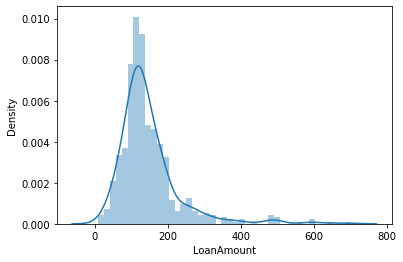

In [32]:
sn.distplot(df['LoanAmount'])

### from above we can conclude that null values can be filled using mean of resp column as the dist plot is normally distributed 

In [33]:
df[['LoanAmount']]=df[['LoanAmount']].fillna(round(df['LoanAmount'].mean()))
df[df.LoanAmount.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [34]:
df[df.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

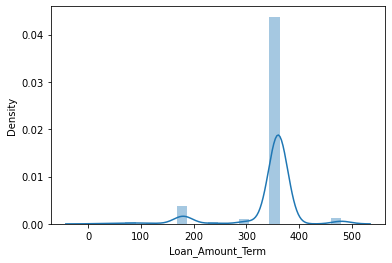

In [35]:
sn.distplot(df['Loan_Amount_Term'])

### from above we can conclude that null values can be filled using mean of resp column as the dist plot is almost normally distributed

In [36]:
df[['Loan_Amount_Term']]=df[['Loan_Amount_Term']].fillna(round(df['Loan_Amount_Term'].mean()))
df[df.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### All null values filled
### conv categorical columns (string dtype) into numerical

In [38]:
dicty={}
for j in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']:
    for i in df[[j]]:
        dicto={}
        for j in range(len(df[i].unique())):
            dicto[df[i].unique()[j]]=j
        dicty[i]=dicto
dicty

{'Gender': {'Male': 0, 'Female': 1},
 'Married': {'No': 0, 'Yes': 1},
 'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
 'Education': {'Graduate': 0, 'Not Graduate': 1},
 'Self_Employed': {'No': 0, 'Yes': 1},
 'Property_Area': {'Urban': 0, 'Rural': 1, 'Semiurban': 2},
 'Loan_Status': {'Y': 0, 'N': 1}}

In [39]:
for j in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']:
    for i in [j]:
        df[i]=df[i].apply(lambda x:dicty[i][x])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [41]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.0,360.0,1.0,0,0
1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,1
2,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0
3,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0
4,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.0,360.0,1.0,1,0
610,0,1,3,0,0,4106,0.0,40.0,180.0,1.0,1,0
611,0,1,1,0,0,8072,240.0,253.0,360.0,1.0,0,0
612,0,1,2,0,0,7583,0.0,187.0,360.0,1.0,0,0


### conv string columns to numerical column

### now use describe func and analyze dataset

In [42]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.397394,342.000000,0.855049,1.050489,0.312704
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037503,64.372489,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


### from above we obtain mean, min, max, std of every column
### check data imbalancement and balance if required

In [43]:
print('Number of Loan_Status as yes are:',df['Loan_Status'].value_counts()[0])
print('Number of Loan_Status as no are:',df['Loan_Status'].value_counts()[1])
print('Unbalanced dataset' if df['Loan_Status'].value_counts()[0]!=df['Loan_Status'].value_counts()[1] else 'Balanced dataset')

Number of Loan_Status as yes are: 422
Number of Loan_Status as no are: 192
Unbalanced dataset


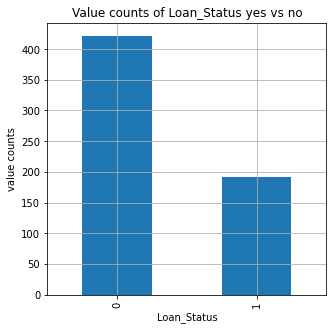

In [44]:
plt.figure(figsize=[5,5])
df['Loan_Status'].value_counts().plot(kind='bar')
plt.xlabel("Loan_Status")
plt.ylabel('value counts')
plt.title('Value counts of Loan_Status yes vs no')
plt.grid()

In [45]:
dfmin=df[df['Loan_Status']==1]
dfmax=df[df['Loan_Status']==0]
dfminup=resample(dfmin,replace=True,n_samples=422,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of Loan_Status as yes are:',dff['Loan_Status'].value_counts()[0])
print('Number of Loan_Status as no are:',dff['Loan_Status'].value_counts()[1])
print('Unbalanced dataset' if dff['Loan_Status'].value_counts()[0]!=dff['Loan_Status'].value_counts()[1] else 'Balanced dataset')

Number of Loan_Status as yes are: 422
Number of Loan_Status as no are: 422
Balanced dataset


### start analyzing to find correlation and the columns to drop

In [46]:
dff.corr()['Loan_Status']

Gender               0.006167
Married             -0.103228
Dependents           0.010286
Education            0.065618
Self_Employed        0.013765
ApplicantIncome      0.043831
CoapplicantIncome    0.062627
LoanAmount           0.061500
Loan_Amount_Term     0.003686
Credit_History      -0.470537
Property_Area       -0.105011
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

### use heatmap to check correlation on dataset

<AxesSubplot:>

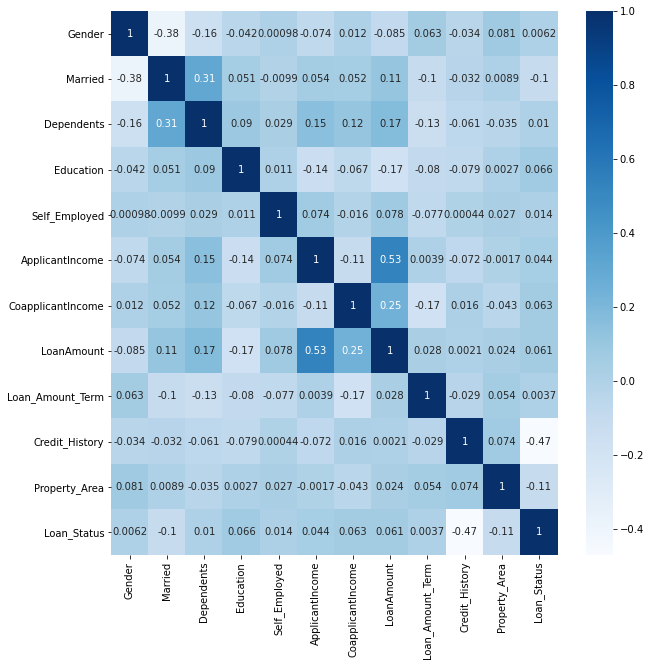

In [47]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True,cmap='Blues')

### from above we find that column gender and Loan_Amount_Term is least correlated. hence drop them

In [48]:
dff=dff.drop(['Loan_Amount_Term','Gender'],axis=1)
dff

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,146.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.0,1.0,0,0
3,1,0,1,0,2583,2358.0,120.0,1.0,0,0
4,0,0,0,0,6000,0.0,141.0,1.0,0,0
5,1,2,0,1,5417,4196.0,267.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...
597,0,0,0,0,2987,0.0,88.0,0.0,2,1
73,1,3,1,0,4755,0.0,95.0,0.0,2,1
23,1,2,1,0,3365,1917.0,112.0,0.0,1,1
128,1,1,0,1,10513,3850.0,160.0,0.0,0,1


### check the graphical relation between Loan_Status column and rest

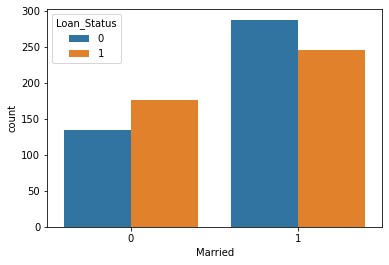

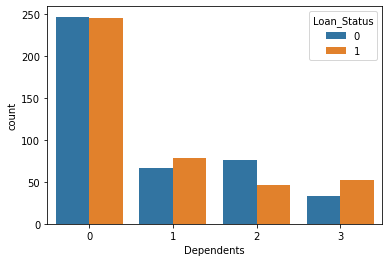

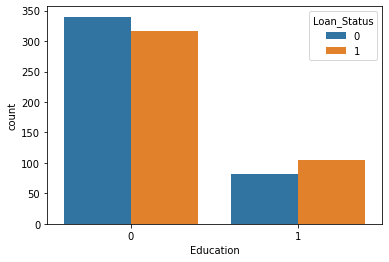

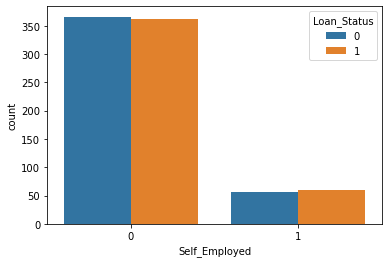

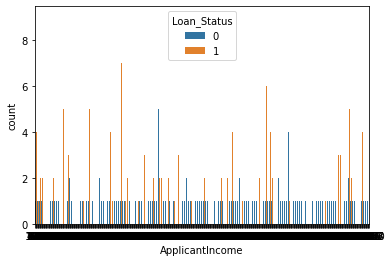

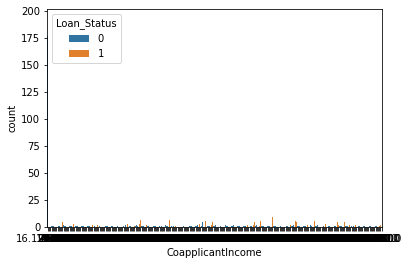

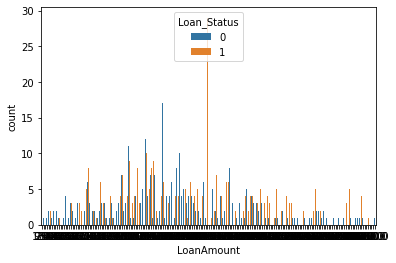

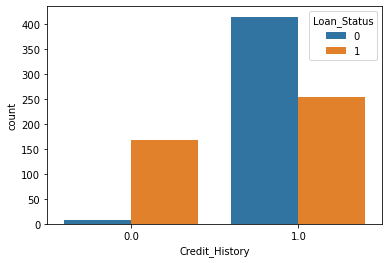

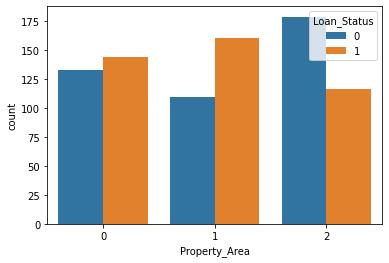

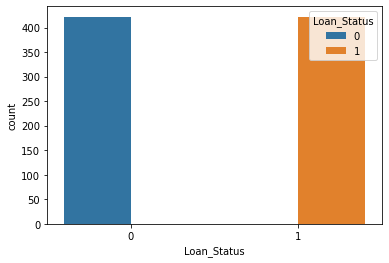

In [49]:
for i in dff.columns:
    sn.countplot(x=i,hue="Loan_Status",data=dff)
    plt.show()

### Acc to above plot self_employed column is unable to distinguish between loan status as yes or no. Meaning it does not provide much impact to the model. drop column

In [50]:
dff=dff.drop(['Self_Employed'],axis=1)

In [51]:
dff

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,0.0,146.0,1.0,0,0
2,1,0,0,3000,0.0,66.0,1.0,0,0
3,1,0,1,2583,2358.0,120.0,1.0,0,0
4,0,0,0,6000,0.0,141.0,1.0,0,0
5,1,2,0,5417,4196.0,267.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...
597,0,0,0,2987,0.0,88.0,0.0,2,1
73,1,3,1,4755,0.0,95.0,0.0,2,1
23,1,2,1,3365,1917.0,112.0,0.0,1,1
128,1,1,0,10513,3850.0,160.0,0.0,0,1


### check dist plots of all columns

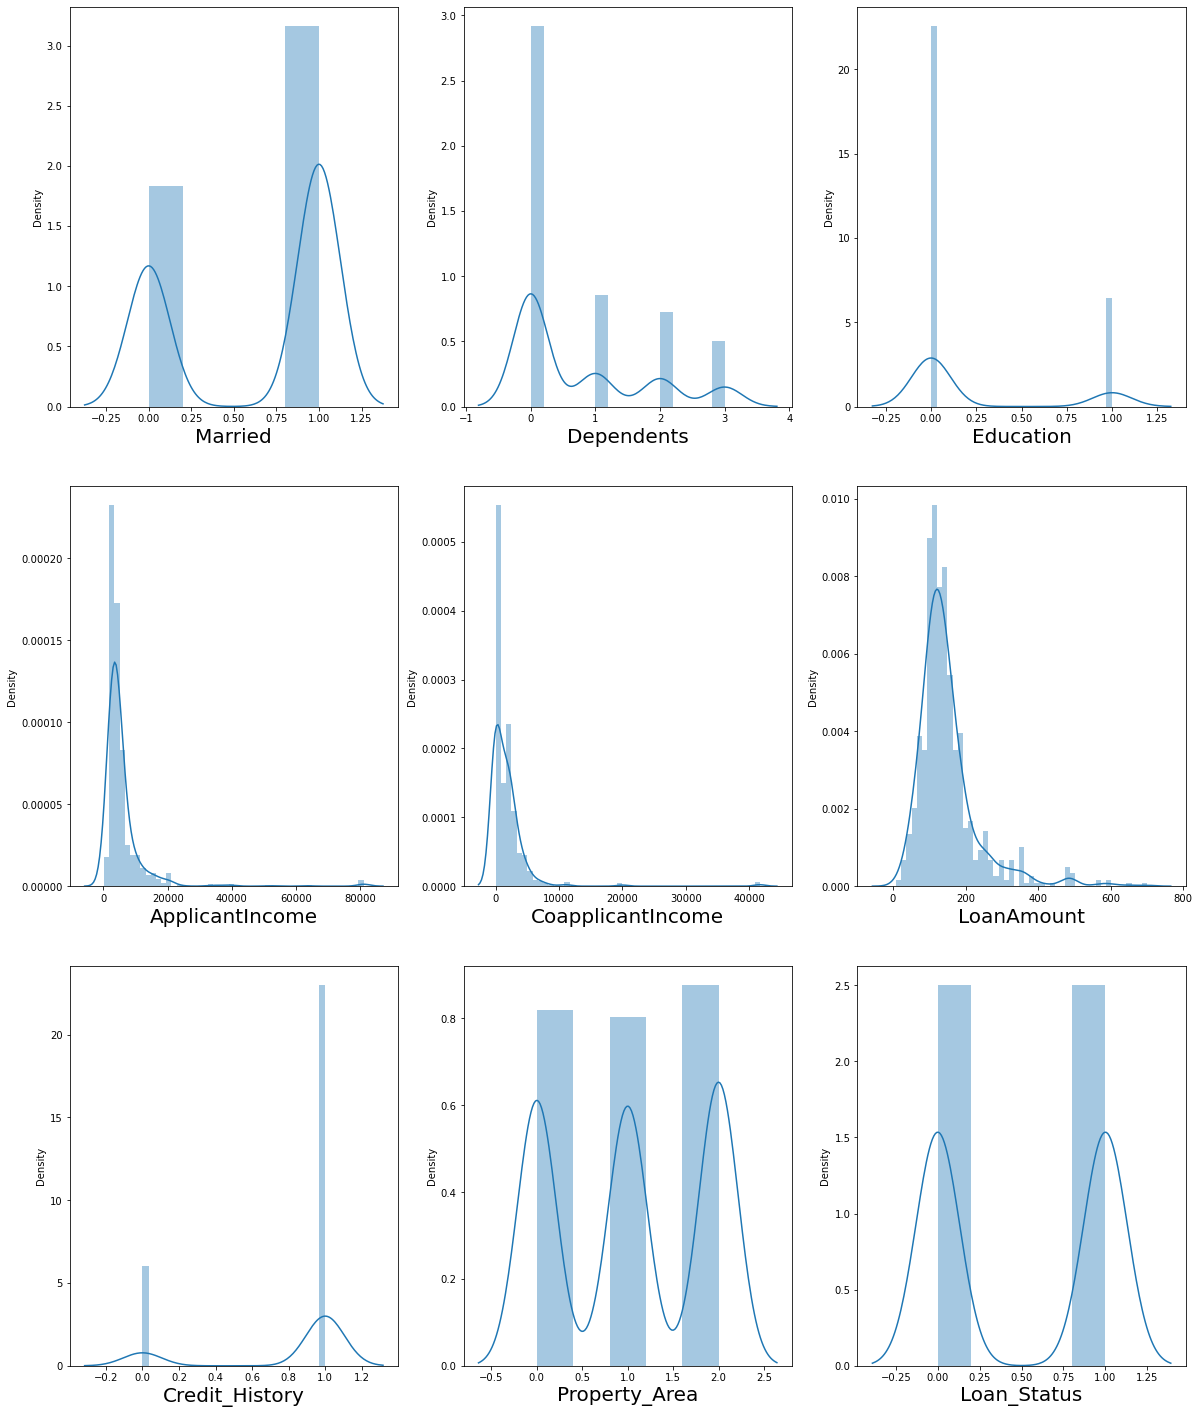

In [52]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### columns having bimodal distribution plot: credit_history, property_area, loanamount, education, dependents, married
### rest all columns have almost normal distribution plot being positively skewed
### check for outliers

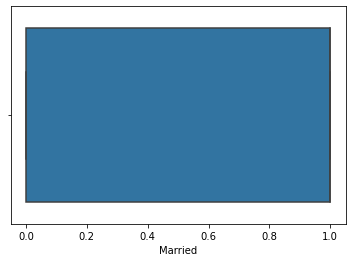

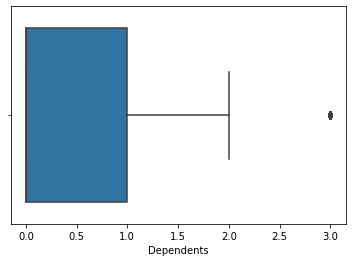

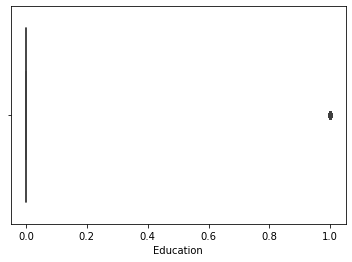

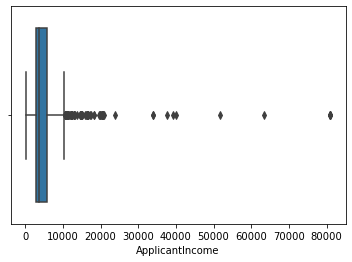

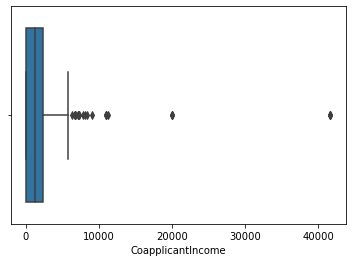

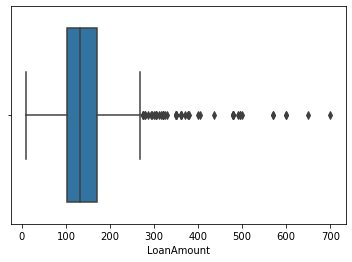

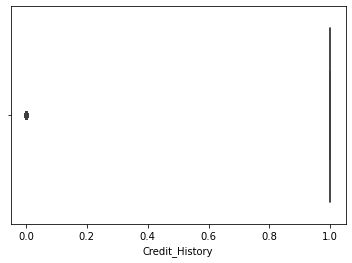

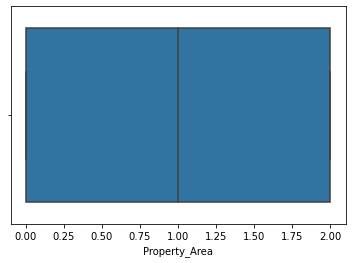

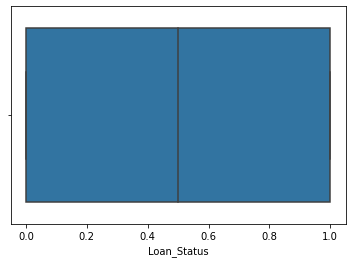

In [53]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

### try remove outliers

In [54]:
z_scr=zscore(dff)
print(dff.shape)
df_new=dff.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(844, 9)
(810, 9)


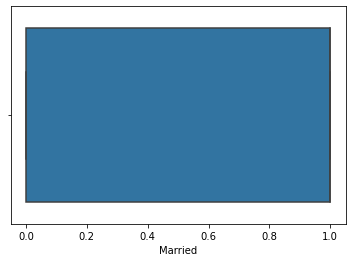

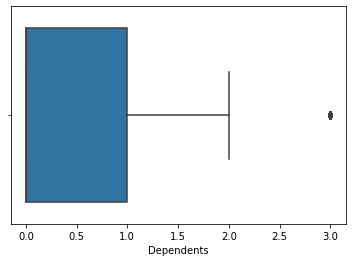

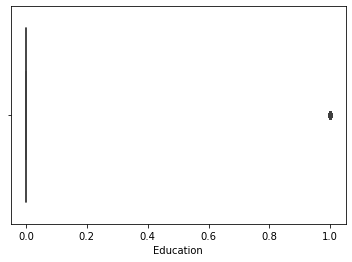

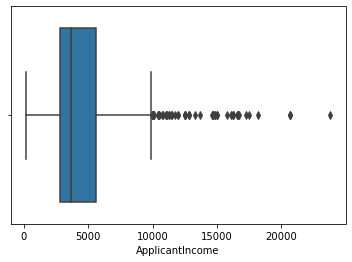

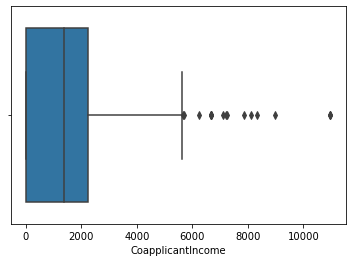

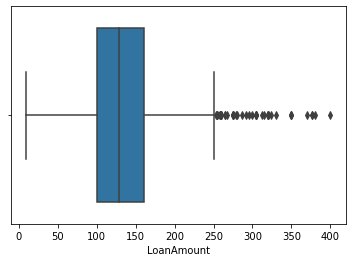

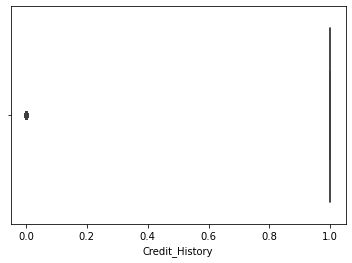

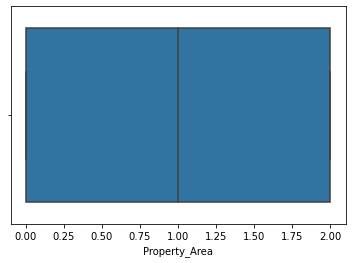

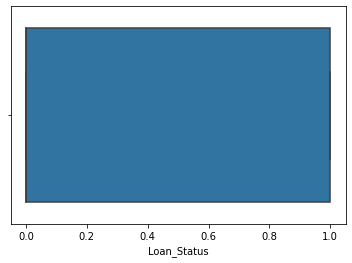

In [55]:
for i in df_new.columns:
    sn.boxplot(df_new[i])
    plt.show()

In [56]:
z_scr=zscore(df_new)
print(df_new.shape)
df=df_new.loc[(abs(z_scr)<3).all(axis=1)]
print(df.shape)

(810, 9)
(757, 9)


### we cannot remove any more outliers as after the above iteration, data loss of more than 10% will occur

In [57]:
y = df[['Loan_Status']]
x = df.drop(columns = ['Loan_Status'])

### from above analyzes i personally choose to use CoapplicantIncome, ApplicantIncome, Credit_History, LoanAmount columns only drop rest

### check biasing and fix it

In [58]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

Married             -0.534244
Dependents           1.077285
Education            1.200398
ApplicantIncome      1.460070
CoapplicantIncome    0.838095
LoanAmount           0.700754
Credit_History      -1.436344
Property_Area       -0.037028
dtype: float64
5


In [59]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [60]:
#lets again check the skewness
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

Married             -0.534244
Dependents           0.496947
Education            1.200398
ApplicantIncome      0.420081
CoapplicantIncome   -0.105175
LoanAmount          -0.298122
Credit_History      -1.436344
Property_Area       -0.037028
dtype: float64

1


### scale non categorical data

In [61]:
scaler = StandardScaler()
x[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = scaler.fit_transform(x[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
x

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,0,0.000000,0.0,0.868659,-1.112327,0.389053,1.0,0
2,1,0.000000,0.0,-0.517224,-1.112327,-1.481776,1.0,0
3,1,0.000000,1.0,-0.787788,0.896815,-0.120084,1.0,0
4,0,0.000000,0.0,0.927924,-1.112327,0.296138,1.0,0
5,1,1.259921,0.0,0.693264,1.322350,2.182325,1.0,0
...,...,...,...,...,...,...,...,...
597,0,0.000000,0.0,-0.525267,-1.112327,-0.860325,0.0,2
73,1,1.442250,1.0,0.405398,-1.112327,-0.684697,0.0,2
23,1,1.259921,1.0,-0.300310,0.762826,-0.291428,0.0,1
128,1,1.000000,0.0,2.367951,1.253500,0.638412,0.0,0


### performing pca and choose appropriate component to train model

In [62]:
for i in range(2,9):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.5883134975933819
3 0.737158114645425
4 0.8234945865480513
5 0.8959550552099688
6 0.9348449660598066
7 0.9679896613552073
8 0.9999999999999998


### i will use 7 as data retention is good(personal choice)

In [63]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)

### algo to find best train test random split for classification issue

In [64]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

### All models we are going to use to iterate and find the best model

In [65]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [66]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.7418474367133044
roc 0.7172557172557172
diff 0.024591719457587202
roc bigger
**********
DecisionTreeClassifier()
score 0.8305529463082637
roc 0.88998613998614
diff 0.05943319367787625
**********
KNeighborsClassifier()
score 0.7651975309748525
roc 0.737006237006237
diff 0.028191293968615527
**********
RandomForestClassifier()
score 0.9192773380897321
roc 0.9149341649341649
diff 0.004343173155567204
roc bigger
**********
SVC()
score 0.7684147627626551
roc 0.7713097713097714
diff 0.002895008547116329
**********
RidgeClassifier()
score 0.7413006599802215
roc 0.7236659736659737
diff 0.017634686314247805
roc bigger
**********
BaggingClassifier()
score 0.904571909162342
roc 0.9145876645876646
diff 0.010015755425322626
**********
GradientBoostingClassifier()
score 0.8863949663436976
roc 0.8743936243936243
diff 0.012001341950073297
**********
SGDClassifier()
score 0.7003548476727406
roc 0.6845114345114346
diff 0.015843413161305997
**********
LGBMClassifie

### from above we can conclude that ExtraTreesClassifier is the best model without any issues of underfitting or overfitting
### fine tune the models

In [68]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':list(range(3,36))}
clf = RandomizedSearchCV(ExtraTreesClassifier(), parameters, cv=10,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


{'max_features': 'log2', 'max_depth': 35, 'criterion': 'gini'}

### find best random state

In [69]:
besttrain(ExtraTreesClassifier(max_depth=35,criterion='gini',max_features='log2'),principalComponents,y)

maximum roc_auc_score is at random state : 47  and it is : 0.9537422037422038


### best random state is 47
### build model, train it & test it

In [70]:
x_train, x_test, y_train, y_test = train_test_split(principalComponents, y,random_state = 47,test_size=0.20,stratify=y)
classmodel=ExtraTreesClassifier(max_depth=35,criterion='gini',max_features='log2')
classmodel.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=35, max_features='log2')

### check all the metrics of the model

In [71]:
y_pred=classmodel.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[72  6]
 [ 4 70]]
f1 score is :  0.9333333333333332
classification report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        78
           1       0.92      0.95      0.93        74

    accuracy                           0.93       152
   macro avg       0.93      0.93      0.93       152
weighted avg       0.93      0.93      0.93       152

AUC ROC Score:  0.9345114345114346
CV mean 0.9533977283977284
std: 0.014373551933161298


### confusion matrix : 4 false positive were detected, 6 true negative
### acc varies from 93.4% to 95.34%
### std error is 1.43%
### test on all whole dataset

In [72]:
y_pred=classmodel.predict(principalComponents)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[381   6]
 [  4 366]]
f1 score is :  0.9865229110512129
classification report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       387
           1       0.98      0.99      0.99       370

    accuracy                           0.99       757
   macro avg       0.99      0.99      0.99       757
weighted avg       0.99      0.99      0.99       757

AUC ROC Score:  0.9868426566100985
CV mean 0.9518346518346519
std: 0.021633347868667097


### confusion matrix : 4 false positive were detected, 6 true negative
### acc varies from 95.18% to 98.65%
### std error is 2.16%

### Roc curve of the rfmodel is shown below

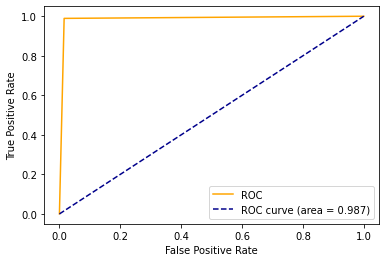

In [73]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### from the above we get all the metrics of the currently trained model.
### put loan status column and predicted loan status column side by side to observe the diff between these two columns

In [74]:
x['Loan_Statuspred']=y_pred
x['Loan_Status']=y
x[['Loan_Status','Loan_Statuspred']]

,Loan_Status,Loan_Statuspred
0,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
597,1,1
73,1,1
23,1,1
128,1,1


### analyze how similar dist plot are of actual and predicted values

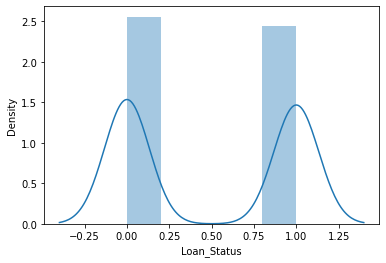

<AxesSubplot:xlabel='Loan_Statuspred', ylabel='Density'>

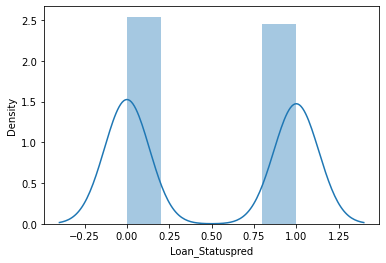

In [80]:
sn.distplot(x['Loan_Status'])
plt.show()
sn.distplot(x['Loan_Statuspred'])

### heatmap of the confusion matrix

<AxesSubplot:>

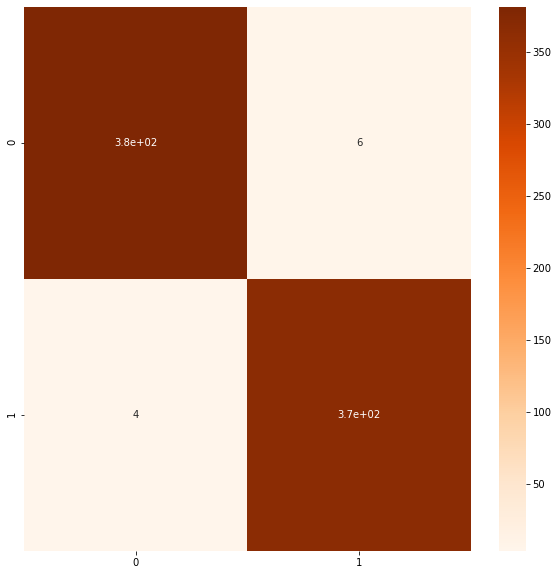

In [81]:
plt.figure(figsize=[10,10])
sn.heatmap(confusion_matrix(x['Loan_Status'],x['Loan_Statuspred']),annot=True,cmap="Oranges",xticklabels=classmodel.classes_
               ,yticklabels=classmodel.classes_)

### 4 false positive were detected
### 6 true negative

In [82]:
print('Number of falsely predicted loan status as yes: 4')

Number of falsely predicted loan status as yes: 4


In [83]:
print('Number of falsely predicted loan status as no: 6')

Number of falsely predicted loan status as no: 6


In [84]:
x.Loan_Status.value_counts()

0    387
1    370
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'Loan_Status yes  vs no')

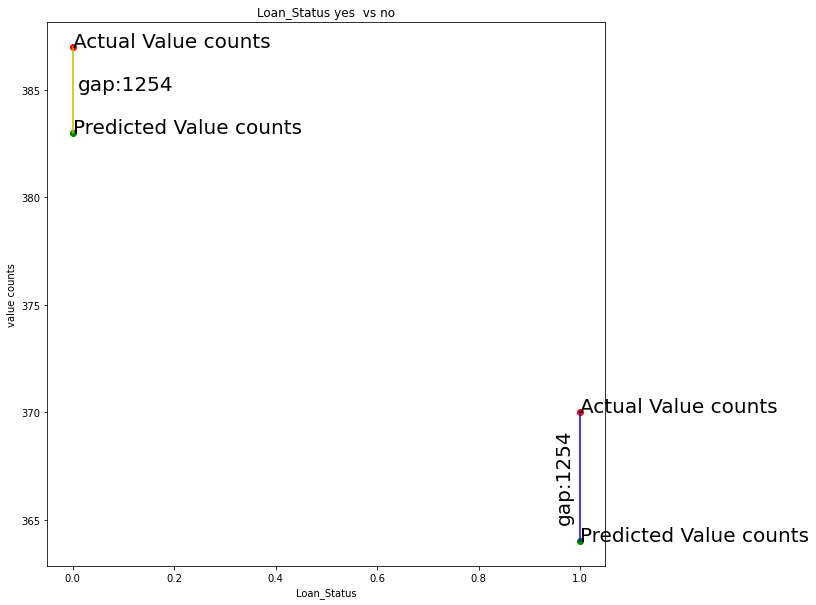

In [90]:
plt.figure(figsize=[10,10])
plt.scatter([0,1],[387,370],color='r')
plt.scatter([0,1],[383,364],color='g')
plt.plot([0,0],[383,387],color='y')
plt.plot([1,1],[364,370],color='b')
plt.text(0,387,'Actual Value counts',fontsize=20)
plt.text(0,383,'Predicted Value counts',fontsize=20)
plt.text(1,370,'Actual Value counts',fontsize=20)
plt.text(1,364,'Predicted Value counts',fontsize=20)
plt.text(0.01,385,'gap:1254',fontsize=20,color='black',rotation='horizontal')
plt.text(0.95,365,'gap:1254',fontsize=20,color='black',rotation='vertical')
plt.xlabel("Loan_Status")
plt.ylabel('value counts')
plt.title('Loan_Status yes  vs no')

### Save model

In [92]:
joblib.dump(classmodel, 'loan_status.pkl')

['loan_status.pkl']